In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\MOHD RAHEEM\Documents\Naresh IT\Data-Files\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


#### (1) Box plot:
- Box plot is used to detect outliers
- Box plot has min q1,q2,q3 & max value
- Inside box plot red line represents median i.e, 50 percentile of the data

#### (2) outlier:
- very very huge observation
- very very low observation
- which pulls the data in any side of the observation
- Mild outliers:
    - Q1 - 1.5 * IQR
    - Q3 + 1.5 * IQR
- Strong outliers:
    - Q1 - 3 * IQR
    - Q3 + 3 * IQR
- IQR: Inter Quartile Range 
    - IQR=Q3-Q1
- Q1: 25p
- Q2: 50p
- Q3: 75p

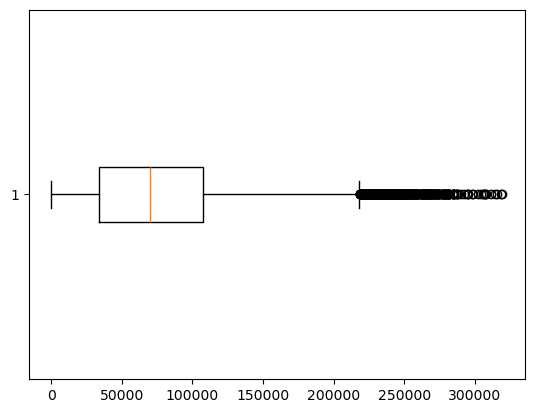

In [3]:
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

<Axes: xlabel='prevailing_wage'>

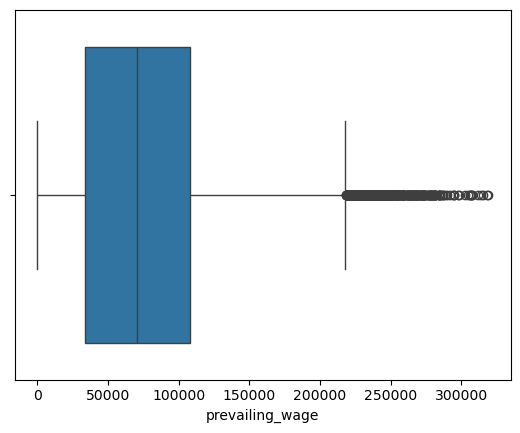

In [4]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')

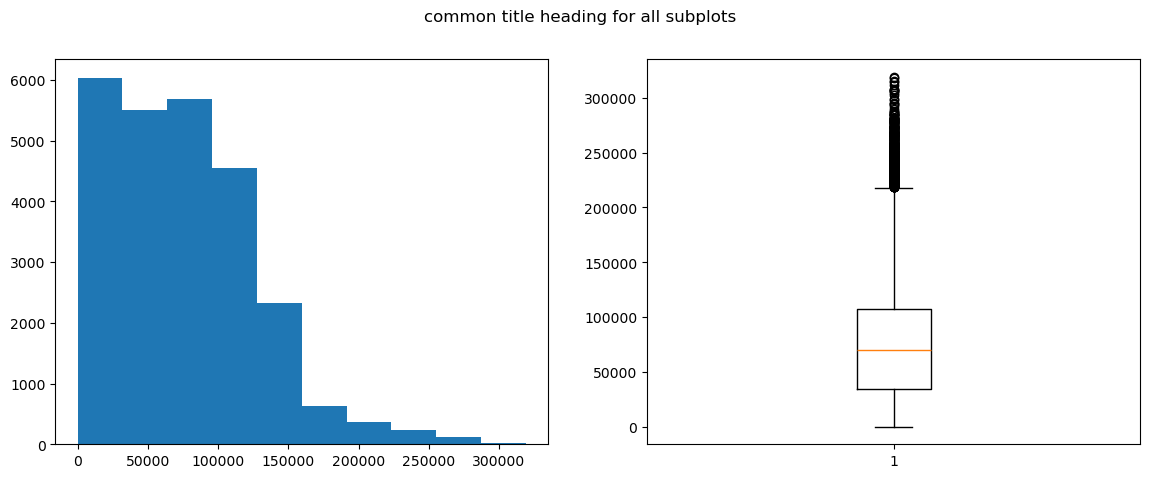

In [5]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplots')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

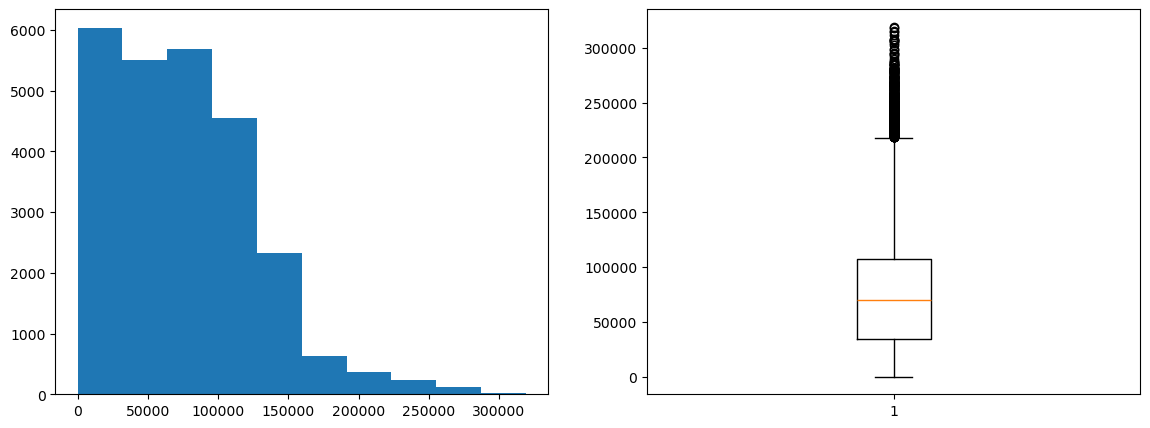

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

#### (3) Finding outliers 
- Outliers are available in less than Q1 - 1.5 * IQR
- Outliers are available in greater than Q3 + 1.5 * IQR

- Step-1:
    - Calculate Q1:25p
    - Calculate Q3:75p
    - IQR=Q3-Q1

- Step-2:
    - LB= Q1 - 1.5 * IQR
    - UB= Q3 + 1.5 * IQR

- Step-3:
    - con1=visa_df['prevailing_wage']<LB
    - con2=visa_df['prevailing_wage']>UB
    - Apply or(|) operator to get the outliers data

#### (I) Outliers data:

In [8]:
# Step1:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1

# Step2:
LB=Q1 - 1.5 * IQR
UB=Q3 + 1.5 * IQR

# Step3:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
print(f"The total outliers present in the Visadataset is {len(outliers_data)} out of {len(visa_df)}")

The total outliers present in the Visadataset is 427 out of 25480


#### (II) Non-Outliers data:

In [9]:
#Step1:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1

# Step2:
LB=Q1 - 1.5 * IQR
UP=Q3 + 1.5 * IQR

#Step3:
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UP
non_outliers_data=visa_df[con1 & con2]
print(f"Non-outliers:{len(non_outliers_data)} out of total data {len(visa_df)}")

Non-outliers:25053 out of total data 25480


#### (III) Histogram & Boxplot for non-outliers data: 

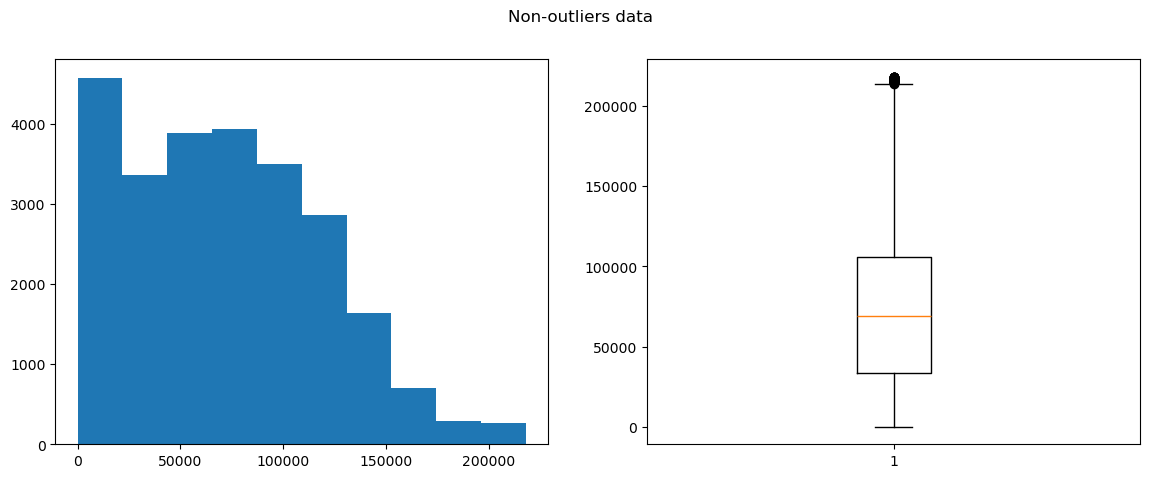

In [13]:
plt.figure(figsize=(14,5))
plt.suptitle("Non-outliers data")
plt.subplot(1,2,1)
plt.hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(non_outliers_data['prevailing_wage'])
plt.show()

#### (IV)Comparing total data with non outliers data:

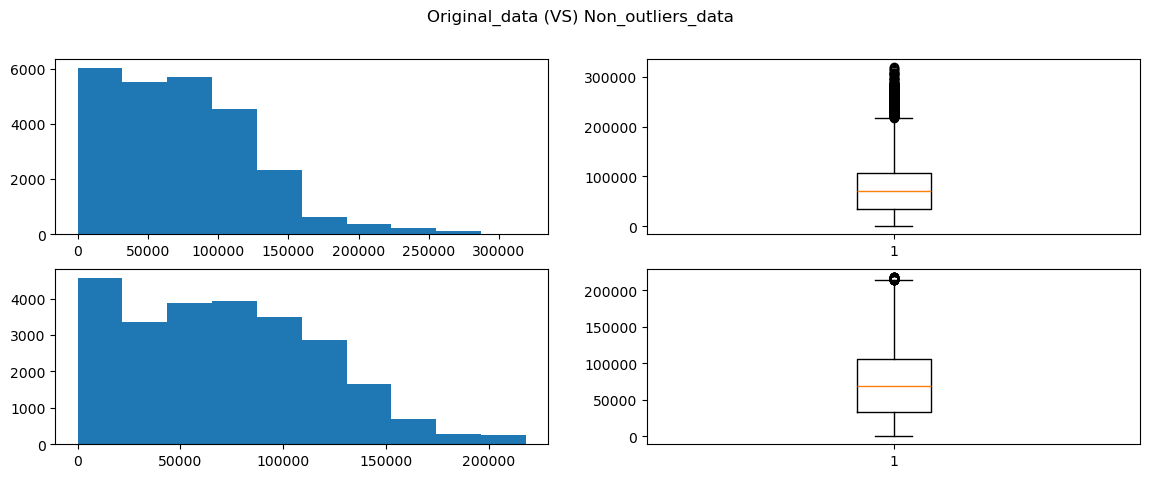

In [15]:
plt.figure(figsize=(14,5))

plt.suptitle('Original_data (VS) Non_outliers_data')
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,4)
plt.boxplot(non_outliers_data['prevailing_wage'])
plt.show()

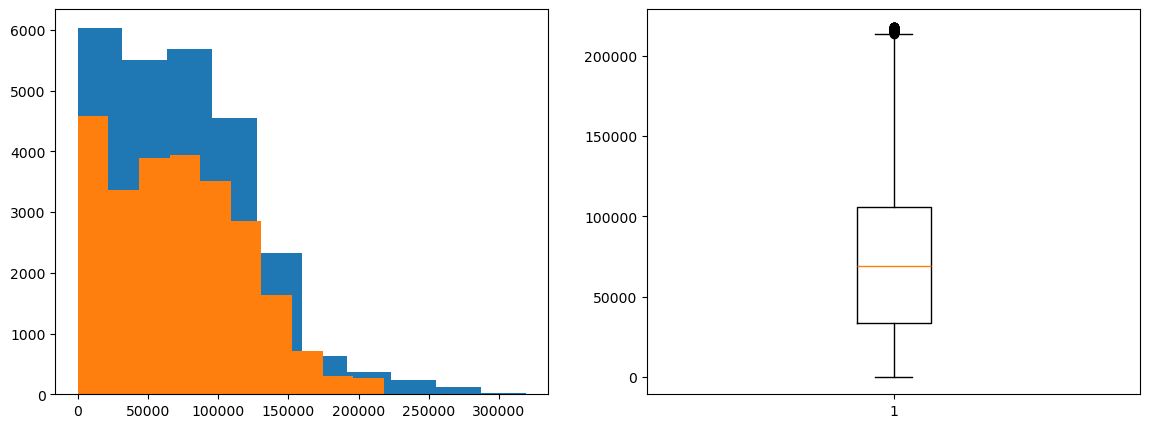

In [20]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])

plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])

plt.show()

### How to deal with the outliers:
#### Method-1: Drop the outliers
- Dropping the outliers is not a good idea
- When you drop the outliers, data will loss
- For example here we are dropping 427 rows
- x% of 25,480=427
- Here it's 1.7% data, It's fine we can drop the outliers

#### Method-2: Fill with median value:
- We already know that outliers does not affect the median
- So we can fill outliers with median value

#### Method-3: Cap the values with Q1 & Q3:
- All the values lesser than lower_bound values can be replaced with Q1 (or) LB
- All the values greater than upper_bound values can be replaced with Q3 (or) UB

#### Let's try with **Method-2**:
### Fill with median values:
- Create a empty list
- Calculate median value: visa_df['prevailing_wage'].median
- Iterate through visa_df['prevailing_wage'].values
- If each value i.e, i, UB then append with median values
- Else append with original(i) value

In [22]:
L1=[]
median=visa_df['prevailing_wage'].median()

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1


LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

for value in visa_df['prevailing_wage'].values:
    if value < LB or value > UB:
        L1.append(median)
    else:
        L1.append(value)

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=L1

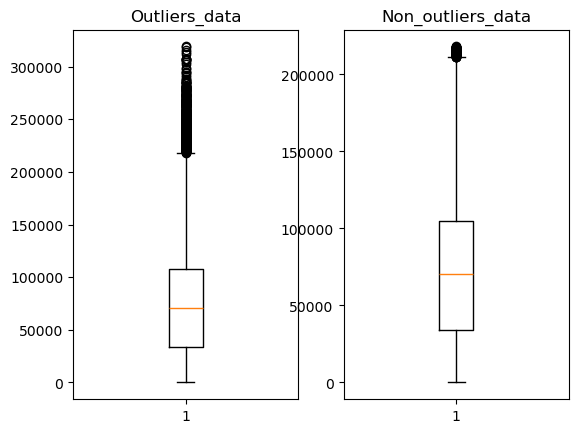

In [39]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.title('Outliers_data')
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.title('Non_outliers_data')
plt.show()

### Topic-2:
- np.where() will use for binary conditions
- It take 3 arguments:
    - condition
    - value of contidion is True
    - value of condition is False

In [33]:
dict1={'Sub':['ML','DS','CS'],
        'Marks':[84,120,76]}
data=pd.DataFrame(dict1)
data

,Sub,Marks
0,ML,84
1,DS,120
2,CS,76


In [34]:
con=data['Marks']>100
l=np.where(con,100,data['Marks'])
l

array([ 84, 100,  76], dtype=int64)

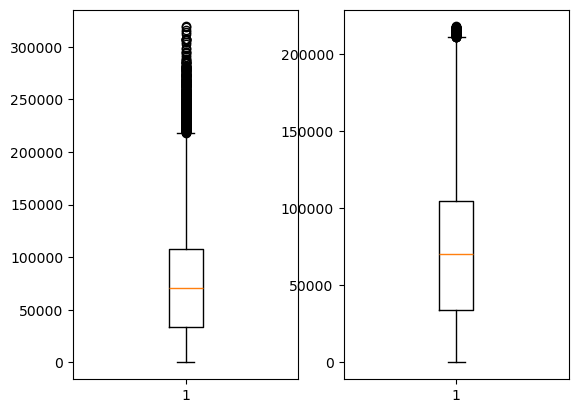

In [38]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1 | con2
median=visa_df['prevailing_wage'].median()
new_data=np.where(con,
median,
visa_df['prevailing_wage'])
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = new_data
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()